## SARSA

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from env_simulator import ToyEnv

In [3]:
env = ToyEnv()

In [4]:
n_states = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
n_episodes = 2000
gamma = 0.98
epsilon = 1
max_steps_per_ep = 100
learning_rate = 0.5
look_ahead = 5
gamma_list = [1]
for i in range(look_ahead-1):
	gamma_list.append(gamma_list[-1]*gamma)
gamma_list = np.array(gamma_list)

In [22]:
Q = np.zeros([n_states, n_actions])

In [23]:
def choose_action(s):
    prob = [float(epsilon)/n_actions]*n_actions
    prob[np.argmax(Q[s,:])] += 1-epsilon
    a = np.random.choice(n_actions,1,p=prob)
    return a[0]

In [29]:
rewards = [] # To hold total reward per episode
avg_rewards = [] # To hold running average of rewards per episode
for ep in range(n_episodes):
    s,r,done = env.reset()
    r_list = []
    s_list = []
    n_step = 1
    ep_r = 0
    epsilon = 1.0/(ep+1)
    while not done:
        a = choose_action(s)
        s1,r,done = env.step(a)
        s_list.append((s,a))
        r_list.append(r)
        if n_step >= look_ahead:
            g = np.dot(np.array(r_list[-look_ahead:]), gamma_list) + (gamma**look_ahead)*Q[s,a]
            Q[s_list[-look_ahead]] += learning_rate*(g - Q[s_list[-look_ahead]])
        s = s1
        ep_r += r
        if n_step > max_steps_per_ep:
            break
        n_step += 1
    remaining = min(look_ahead, len(r_list))
    for i in range(1, remaining):
        g = np.dot(np.array(r_list[-remaining + i:]), gamma_list[:remaining-i]) + (gamma**(remaining-i))*Q[s,a]
        Q[s_list[-remaining + i]] += learning_rate*(g - Q[s_list[-remaining + i]])
    rewards.append(ep_r)
    avg_rewards.append(sum(rewards[-500:])/500.0)
    if not ep % 100:
        print("Episode #%d : Reward = %f, Avg Rew = %f" % (ep, ep_r, avg_rewards[-1]))

Episode #0 : Reward = 1.000000, Avg Rew = 0.002000
Episode #100 : Reward = 1.000000, Avg Rew = -0.002000
Episode #200 : Reward = -1.000000, Avg Rew = 0.038000
Episode #300 : Reward = 1.000000, Avg Rew = 0.066000
Episode #400 : Reward = -1.000000, Avg Rew = 0.090000
Episode #500 : Reward = -1.000000, Avg Rew = 0.084000
Episode #600 : Reward = 1.000000, Avg Rew = 0.144000
Episode #700 : Reward = -1.000000, Avg Rew = 0.144000
Episode #800 : Reward = 1.000000, Avg Rew = 0.072000
Episode #900 : Reward = 1.000000, Avg Rew = 0.108000
Episode #1000 : Reward = -1.000000, Avg Rew = 0.104000
Episode #1100 : Reward = 1.000000, Avg Rew = 0.092000
Episode #1200 : Reward = 1.000000, Avg Rew = 0.172000
Episode #1300 : Reward = 1.000000, Avg Rew = 0.312000
Episode #1400 : Reward = 1.000000, Avg Rew = 0.364000
Episode #1500 : Reward = -1.000000, Avg Rew = 0.480000
Episode #1600 : Reward = -1.000000, Avg Rew = 0.484000
Episode #1700 : Reward = -1.000000, Avg Rew = 0.424000
Episode #1800 : Reward = 1.0000

Q Values Learned [[-35.28654713 -37.13056422 -34.29632906 -33.36333405]
 [-38.7186604  -38.63335089 -38.4147072  -37.56873022]
 [-32.49498844 -37.20438182 -37.97211511 -37.08671951]
 [-42.28890241 -42.28890241 -42.28890241 -42.21101254]
 [  0.5         49.99983192   0.5          0.5       ]]


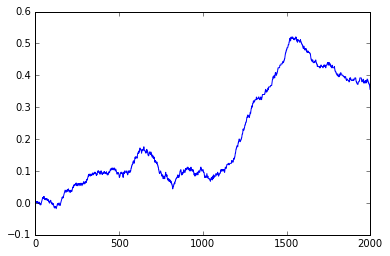

In [30]:
print "Q Values Learned", Q
plt.plot(avg_rewards)